# Neural Network Classification Model With PyTorch

In [60]:
# importing
try: 
    import torch
    import numpy
    import matplotlib.pyplot as plt
    from torch import nn # nn-> all te building blocks for a neural network
    from pathlib import Path
    import sklearn
    from sklearn.datasets import make_circles # to create a toy dataset
    from sklearn.model_selection import train_test_split
    import pandas as pd
    print("Done Successfully")
except Exception as e:
    print("Failed to import",e)


Done Successfully


# 1. Make classification data and get it ready


In [61]:
# make 1000 samples 
n=1000
# create circles 
X, y= make_circles(n,
                   noise=0.03,
                  random_state=42) 

In [62]:
len(X), len(y)

(1000, 1000)

In [63]:
# check samples of the data created
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [64]:
# make dataframes with pandas 
circles=pd.DataFrame({"X1:": X[:,0],
                     "X2:": X[:,1],
                     "Labels:": y})
circles.head(10) # shows first 10, defaukt is 5


,X1:,X2:,Labels:
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


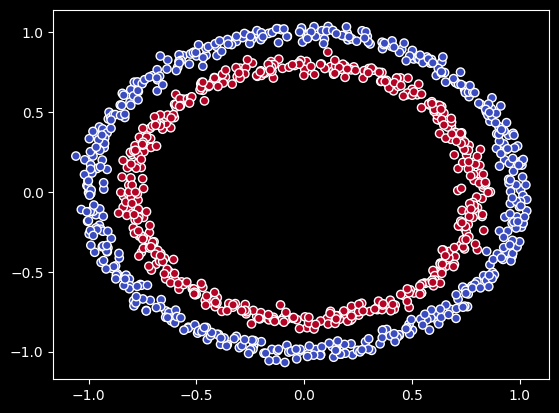

In [65]:
# visualise our data
plt.style.use("dark_background")

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="white"
)

plt.show()


In [66]:
# check the shape of x and y
print(f'Shape of X: {X.shape} \t Shape of y: {y.shape}')

# view the first sample of features(X) and labels(y)
print(f'Sample of X:{X[0]} \t Sample of y: {y[0]}')
print(f'Shape of X: {X[0].shape} \t Shape of y: {y[0].shape}')


Shape of X: (1000, 2) 	 Shape of y: (1000,)
Sample of X:[0.75424625 0.23148074] 	 Sample of y: 1
Shape of X: (2,) 	 Shape of y: ()


In [67]:
# turn the data into tensors 
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# view the first 5 
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [68]:
# split into training and testing randomly by sklearn's train_test_split method 
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y, 
                                                   test_size=0.2, # percentage of data to be used for testing purpose, eg 0.5 would be for a 50-50 split
                                                   random_state=42)
print(len(X_train),len(X_test), len(y_train), len(y_test)) 

800 200 800 200


# Build, train and test.
- Define device agnostic code so that our code runs on an accelerator(GPU) when available.
- Set up a model class with `nn.Module` as inherited class.
- Define loss and optimizer.
- Create training and testing loops.

In [69]:
# device agnostic code 
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [70]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# Steps to create our model:
- Set up a model class with nn.Module as inherited class.
- Create 2 nn.Linear() layers capable of handling the shapes of data
- Define a forward method that outlines the forward pass
- Create an object of the class and send it to the target device 

In [71]:
# creating model class
class Circle_Point_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # create two layers to handle the shapes of our data 
        self.layer_1=nn.Linear(in_features=2, out_features=5)
        self.layer_2=nn.Linear(in_features=5, out_features=1)

        # define a forward function :
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2                            

In [72]:
# instantiate and send it to the device 
model_2=Circle_Point_Classifier().to(device)
model_2

Circle_Point_Classifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [73]:
device


'cpu'

In [74]:
# replicate the model using nn.sequential
repli_model=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

repli_model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [75]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

# Setting up optimizer and loss function
- Here we're going with the BCEWithLogitsLoss() and adam optimizer

In [76]:
# set up loss function
loss_fn=nn.BCEWithLogitsLoss() # has sigmoid activation function inside

# set up the optimizer
optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [77]:
# calculate accuracy ~per 100 predictions 
def accuracy_fn(y_true, y_pred):
    right=torch.eq(y_true, y_pred).sum().item()
    acc=(right/len(y_pred))*100
    return acc
    


# Training the model

In [78]:
# before training the model,lets see whats coming out of the forward pass on the test data..
y_logits=model_2(X_test.to(device))[:5]
y_logits, y_test[:5]

(tensor([[-0.1269],
         [-0.0967],
         [-0.1908],
         [-0.1089],
         [-0.1667]], grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [79]:
# we can see that the model is returning raw numbers(unknown/ logits). 
# convert these into probabilities using the sigmoid function

y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SigmoidBackward0>)

In [80]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_2.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_2(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


In [81]:
# looks like our model isnt learning anything, so lets make  some predictions and plot them 
# plot decision boundary
import requests
from pathlib import Path

# download helper function from pytorch repo if not already downloaded
if Path("helper_functions.py").is_file():
    print("Requirement alread satisfied")
else: 
    print("Downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Requirement alread satisfied


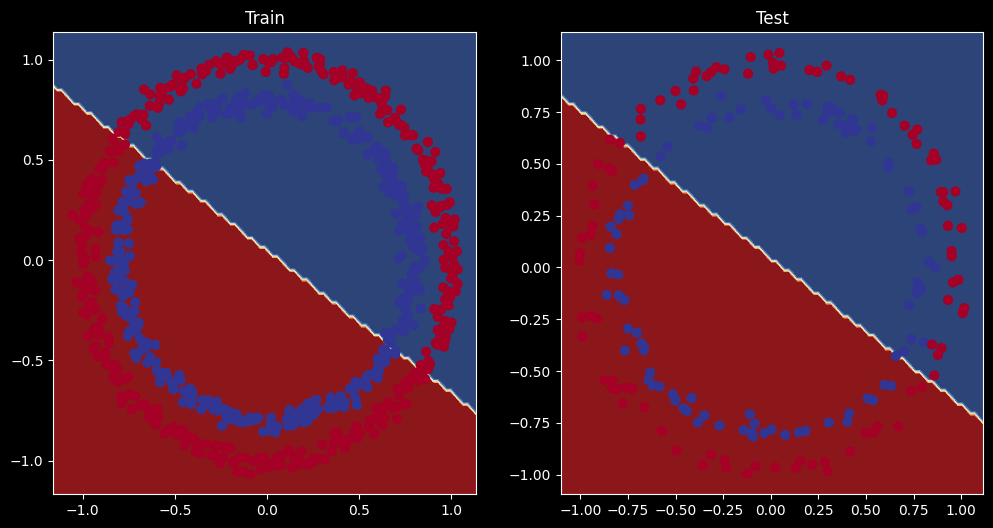

In [82]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)